# <center>Тема 3. Обучение с учителем. Методы классификации
## <center>Практика. Дерево решений в задаче предсказания выживания пассажиров "Титаника". Решение

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
def write_to_submission_file(predicted_labels, out_file, train_num=891,
                    target='Survived', index_label="PassengerId"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(train_num + 1,
                                                  train_num + 1 +
                                                  predicted_labels.shape[0]),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [3]:
# Raw data 
TRAIN_DF = pd.read_csv("titanic_train.csv") 
TEST_DF = pd.read_csv("titanic_test.csv") 
# Prepared data
from mytitanic import X_train, y_train, train_df, test_df, untrained_columns

removed Int64Index([5, 3, 4, 6], dtype='int64') for column Parch
removed Int64Index([8, 5], dtype='int64') for column SibSp


In [9]:
TRAIN_DF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


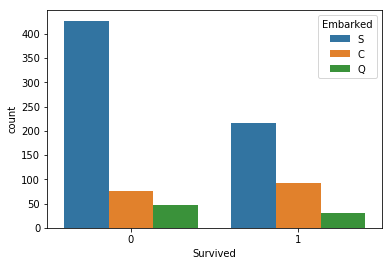

In [32]:
sns.countplot(x='Survived', hue='Embarked', data=TRAIN_DF)

In [38]:
import scipy.stats as stats

stats.f_oneway(CC, SS, QQ)

F_onewayResult(statistic=13.605270445693582, pvalue=1.514339014290716e-06)

In [37]:
CC = TRAIN_DF[TRAIN_DF['Embarked'] == 'C'].Survived.values
SS = TRAIN_DF[TRAIN_DF['Embarked'] == 'S'].Survived.values
QQ = TRAIN_DF[TRAIN_DF['Embarked'] == 'Q'].Survived.values

In [41]:
type(CC)

numpy.ndarray

{'boxes': [<matplotlib.lines.Line2D at 0x20b87174da0>,
 'caps': [<matplotlib.lines.Line2D at 0x20b87180898>,
 'fliers': [<matplotlib.lines.Line2D at 0x20b87180fd0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x20b87180ef0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x20b87174ef0>,
  <matplotlib.lines.Line2D at 0x20b8719c3c8>]}

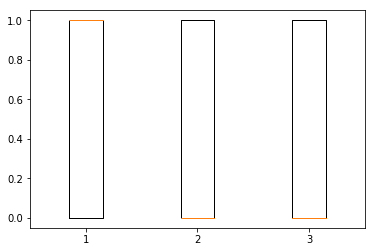

In [48]:
plt.boxplot([CC, QQ, SS])

In [49]:
CC.mean()

0.5535714285714286

In [50]:
SS.mean()

0.33695652173913043

In [61]:
CC.mean() - 1.96 * np.std(CC)/sqrt(len(CC)), CC.mean() + 1.96 * np.std(CC)/sqrt(len(CC))

(0.47839801793530895, 0.6287448392075483)

In [60]:
from numpy import sqrt

In [55]:
np.std(CC)

0.4971218181098234

In [58]:
1/np.mean(CC)

1.8064516129032258

{'boxes': [<matplotlib.lines.Line2D at 0x20b873cb390>],
 'caps': [<matplotlib.lines.Line2D at 0x20b873cbe48>,
 'fliers': [<matplotlib.lines.Line2D at 0x20b873d6860>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x20b873d6518>],
 'whiskers': [<matplotlib.lines.Line2D at 0x20b873cb7b8>,
  <matplotlib.lines.Line2D at 0x20b873cbb00>]}

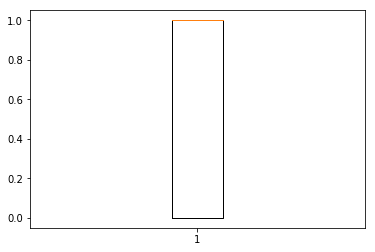

In [66]:
plt.boxplot(CC)

In [76]:
import matplotlib.pyplot as plt

data = np.array([1,1,0,0,0,1,1,0,1])

sns.catplot(data)


plt.show()

TypeError: object of type 'NoneType' has no len()